In [ ]:
zip_path = '/content/drive/My\ Drive/Dataset/Neural\ Data/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

replace /content/test/cat/14392.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/test/cat/14386.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

Tunning : Deep CNN, 3 layer Conv2D(filter = (32, 64, 128), kernel=3x3, activation=relu, kernel_initializer='glorot_uniform', padding='same'). optimizer=Adam. Data train dilakukan augmentation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)            

In [ ]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1.0/255.0)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_model_tunning3 = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=100)

Epoch 1/100
100/100 [==============================] - 143s 1s/step - loss: 0.7339 - accuracy: 0.5550 - val_loss: 0.6163 - val_accuracy: 0.6425
Epoch 2/100
100/100 [==============================] - 142s 1s/step - loss: 0.5937 - accuracy: 0.6833 - val_loss: 0.5402 - val_accuracy: 0.7211
Epoch 3/100
100/100 [==============================] - 141s 1s/step - loss: 0.5402 - accuracy: 0.7299 - val_loss: 0.4959 - val_accuracy: 0.7598
Epoch 4/100
100/100 [==============================] - 142s 1s/step - loss: 0.5162 - accuracy: 0.7441 - val_loss: 0.4908 - val_accuracy: 0.7651
Epoch 5/100
100/100 [==============================] - 141s 1s/step - loss: 0.4805 - accuracy: 0.7669 - val_loss: 0.4513 - val_accuracy: 0.7957
Epoch 6/100
100/100 [==============================] - 140s 1s/step - loss: 0.4466 - accuracy: 0.7905 - val_loss: 0.4290 - val_accuracy: 0.8011
Epoch 7/100
100/100 [==============================] - 142s 1s/step - loss: 0.4363 - accuracy: 0.7990 - val_loss: 0.4223 - val_accuracy:

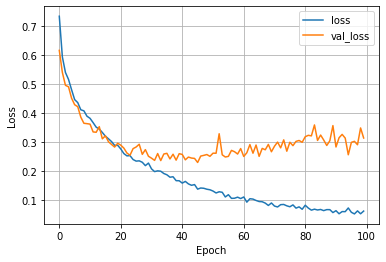

In [ ]:
plot_loss(history_model_tunning3)

Epoch 70/100 -- val_loss: 0.2669 - val_accuracy: 0.9214

Ini adalah akurasi yang paling tinggi saya dapatkan yaitu 92% yaitu pada epochs 70 dan nilai val_loss nya kecil. disini saya gunakan data augmentation dan Deep CNN menggunakan optimizer Adam. Saya berasumsi Adam cukup bagus untuk digunakan sebagai optimizer.